In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.2 MB/s eta 0:00:00


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


In [ ]:
import requests
import pandas as pd
import time
from io import StringIO  # Import StringIO from io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
import optuna
import shap
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
# Base URL for the API
base_url = "https://data.austintexas.gov/resource/9t4d-g238.csv"

# Parameters for pagination
limit = 1000
offset = 0
all_data = []

# Function to get data with offset
def get_data(offset):
    params = {
        "$limit": limit,
        "$offset": offset
    }
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        print(f"Data retrieved with offset: {offset}")
        # Use StringIO from io module
        return pd.read_csv(StringIO(response.text))
    else:
        print(f"Failed to retrieve data for offset: {offset}")
        return pd.DataFrame()

# Loop through the dataset using pagination
while True:
    # Get data for the current offset
    df = get_data(offset)

    # Break if no more data is returned
    if df.empty:
        print("No more data to retrieve.")
        break

    # Append the data to the list
    all_data.append(df)

    # Increment the offset for the next request
    offset += limit

    # Sleep to avoid hitting the API rate limit
    time.sleep(1)

# Combine all pages into a single DataFrame
final_df = pd.concat(all_data, ignore_index=True)

# Display the combined DataFrame
print(f"\nFinal DataFrame Shape: {final_df.shape}")
print(final_df.head())

Data retrieved with offset: 0
Data retrieved with offset: 1000
Data retrieved with offset: 2000
Data retrieved with offset: 3000
Data retrieved with offset: 4000
Data retrieved with offset: 5000
Data retrieved with offset: 6000
Data retrieved with offset: 7000
Data retrieved with offset: 8000
Data retrieved with offset: 9000
Data retrieved with offset: 10000
Data retrieved with offset: 11000
Data retrieved with offset: 12000
Data retrieved with offset: 13000
Data retrieved with offset: 14000
Data retrieved with offset: 15000
Data retrieved with offset: 16000
Data retrieved with offset: 17000
Data retrieved with offset: 18000
Data retrieved with offset: 19000
Data retrieved with offset: 20000
Data retrieved with offset: 21000
Data retrieved with offset: 22000
Data retrieved with offset: 23000
Data retrieved with offset: 24000
Data retrieved with offset: 25000
Data retrieved with offset: 26000
Data retrieved with offset: 27000
Data retrieved with offset: 28000
Data retrieved with offset:

# **Data Dictionary for Austin Animal Center Outcomes Dataset**

| Column Name         | Description                                                  | API Field Name      | Data Type           |
|---------------------|--------------------------------------------------------------|---------------------|---------------------|
| **Animal ID**       | Unique identifier for each animal                            | `animal_id`         | Text                |
| **Name**            | Name of the animal (if available)                             | `name`              | Text                |
| **DateTime**        | Date and time of the outcome event                            | `datetime`          | Floating Timestamp  |
| **MonthYear**       | Month and year of the outcome event                           | `monthyear`         | Floating Timestamp  |
| **Date of Birth**   | Date of birth of the animal                                   | `date_of_birth`     | Floating Timestamp  |
| **Outcome Type**    | General category of outcome (e.g., Adoption, Transfer, Euthanasia) | `outcome_type` | Text                |
| **Outcome Subtype** | Specific subtype of outcome (e.g., Offsite, Foster)            | `outcome_subtype`   | Text                |
| **Animal Type**     | Type of animal (e.g., Dog, Cat)                               | `animal_type`       | Text                |
| **Sex upon Outcome**| Sex and reproductive status upon outcome (e.g., Neutered Male) | `sex_upon_outcome`  | Text                |
| **Age upon Outcome**| Age of the animal at the time of outcome                      | `age_upon_outcome`  | Text                |
| **Breed**           | Breed of the animal                                            | `breed`             | Text                |
| **Color**           | Color description of the animal                               | `color`             | Text                |


In [ ]:
# Base URL for the API
base_url = "https://data.austintexas.gov/resource/wter-evkm.csv"

# Parameters for pagination
limit = 1000
offset = 0
all_data = []

# Function to get data with offset
def get_data(offset):
    params = {
        "$limit": limit,
        "$offset": offset
    }
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        print(f"Data retrieved with offset: {offset}")
        # Use StringIO from io module
        return pd.read_csv(StringIO(response.text))
    else:
        print(f"Failed to retrieve data for offset: {offset}")
        return pd.DataFrame()

# Loop through the dataset using pagination
while True:
    # Get data for the current offset
    df = get_data(offset)

    # Break if no more data is returned
    if df.empty:
        print("No more data to retrieve.")
        break

    # Append the data to the list
    all_data.append(df)

    # Increment the offset for the next request
    offset += limit

    # Sleep to avoid hitting the API rate limit
    time.sleep(1)

# Combine all pages into a single DataFrame
final_df1 = pd.concat(all_data, ignore_index=True)

# Display the combined DataFrame
print(f"\nFinal DataFrame Shape: {final_df.shape}")
print(final_df1.head())

Data retrieved with offset: 0
Data retrieved with offset: 1000
Data retrieved with offset: 2000
Data retrieved with offset: 3000
Data retrieved with offset: 4000
Data retrieved with offset: 5000
Data retrieved with offset: 6000
Data retrieved with offset: 7000
Data retrieved with offset: 8000
Data retrieved with offset: 9000
Data retrieved with offset: 10000
Data retrieved with offset: 11000
Data retrieved with offset: 12000
Data retrieved with offset: 13000
Data retrieved with offset: 14000
Data retrieved with offset: 15000
Data retrieved with offset: 16000
Data retrieved with offset: 17000
Data retrieved with offset: 18000
Data retrieved with offset: 19000
Data retrieved with offset: 20000
Data retrieved with offset: 21000
Data retrieved with offset: 22000
Data retrieved with offset: 23000
Data retrieved with offset: 24000
Data retrieved with offset: 25000
Data retrieved with offset: 26000
Data retrieved with offset: 27000
Data retrieved with offset: 28000
Data retrieved with offset:

In [ ]:
final_df1.head()

animal_id          name                 datetime                datetime2  \
0   A786884        *Brock  2019-01-03T16:19:00.000  2019-01-03T16:19:00.000   
1   A706918         Belle  2015-07-05T12:59:00.000  2015-07-05T12:59:00.000   
2   A724273       Runster  2016-04-14T18:43:00.000  2016-04-14T18:43:00.000   
3   A665644           NaN  2013-10-21T07:59:00.000  2013-10-21T07:59:00.000   
4   A857105  Johnny Ringo  2022-05-12T00:23:00.000  2022-05-12T00:23:00.000   

                        found_location    intake_type intake_condition  \
0  2501 Magin Meadow Dr in Austin (TX)          Stray           Normal   
1     9409 Bluegrass Dr in Austin (TX)          Stray           Normal   
2   2818 Palomino Trail in Austin (TX)          Stray           Normal   
3                          Austin (TX)          Stray             Sick   
4   4404 Sarasota Drive in Austin (TX)  Public Assist           Normal   

  animal_type sex_upon_intake age_upon_intake                     breed  \
0         Dog   Neutered Male         2 years                Beagle Mix   
1         Dog   Spayed Female         8 years  English Springer Spaniel   
2         Dog     Intact Male       11 months               Basenji Mix   
3         Cat   Intact Female         4 weeks    Domestic Shorthair Mix   
4         Cat   Neutered Male         2 years        Domestic Shorthair   

          color  
0      Tricolor  
1   White/Liver  
2   Sable/White  
3        Calico  
4  Orange Tabby

In [ ]:
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171665 entries, 0 to 171664
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   animal_id         171665 non-null  object
 1   name              122384 non-null  object
 2   datetime          171665 non-null  object
 3   datetime2         171665 non-null  object
 4   found_location    171665 non-null  object
 5   intake_type       171665 non-null  object
 6   intake_condition  171665 non-null  object
 7   animal_type       171665 non-null  object
 8   sex_upon_intake   171663 non-null  object
 9   age_upon_intake   171664 non-null  object
 10  breed             171665 non-null  object
 11  color             171665 non-null  object
dtypes: object(12)
memory usage: 15.7+ MB


In [ ]:
final_df.head()

animal_id       name                 datetime                monthyear  \
0   A882831  *Hamilton  2023-07-01T18:12:00.000  2023-07-01T18:12:00.000   
1   A794011      Chunk  2019-05-08T18:20:00.000  2019-05-08T18:20:00.000   
2   A776359      Gizmo  2018-07-18T16:02:00.000  2018-07-18T16:02:00.000   
3   A821648        NaN  2020-08-16T11:38:00.000  2020-08-16T11:38:00.000   
4   A720371      Moose  2016-02-13T17:59:00.000  2016-02-13T17:59:00.000   

             date_of_birth outcome_type outcome_subtype animal_type  \
0  2023-03-25T00:00:00.000     Adoption             NaN         Cat   
1  2017-05-02T00:00:00.000    Rto-Adopt             NaN         Cat   
2  2017-07-12T00:00:00.000     Adoption             NaN         Dog   
3  2019-08-16T00:00:00.000   Euthanasia             NaN       Other   
4  2015-10-08T00:00:00.000     Adoption             NaN         Dog   

  sex_upon_outcome age_upon_outcome                               breed  \
0    Neutered Male         3 months              Domestic Shorthair Mix   
1    Neutered Male          2 years              Domestic Shorthair Mix   
2    Neutered Male           1 year             Chihuahua Shorthair Mix   
3          Unknown           1 year                             Raccoon   
4    Neutered Male         4 months  Anatol Shepherd/Labrador Retriever   

               color  
0        Black/White  
1  Brown Tabby/White  
2        White/Brown  
3               Gray  
4               Buff

In [ ]:
merged_df = pd.merge(final_df, final_df1, on='animal_id', how='outer')
merged_df.head()

animal_id name_x               datetime_x                monthyear  \
0   A006100  Scamp  2014-12-20T16:35:00.000  2014-12-20T16:35:00.000   
1   A006100  Scamp  2014-12-20T16:35:00.000  2014-12-20T16:35:00.000   
2   A006100  Scamp  2014-12-20T16:35:00.000  2014-12-20T16:35:00.000   
3   A006100  Scamp  2017-12-07T00:00:00.000  2017-12-07T00:00:00.000   
4   A006100  Scamp  2017-12-07T00:00:00.000  2017-12-07T00:00:00.000   

             date_of_birth     outcome_type outcome_subtype animal_type_x  \
0  2007-07-09T00:00:00.000  Return to Owner             NaN           Dog   
1  2007-07-09T00:00:00.000  Return to Owner             NaN           Dog   
2  2007-07-09T00:00:00.000  Return to Owner             NaN           Dog   
3  2007-07-09T00:00:00.000  Return to Owner             NaN           Dog   
4  2007-07-09T00:00:00.000  Return to Owner             NaN           Dog   

  sex_upon_outcome age_upon_outcome  ...               datetime_y  \
0    Neutered Male          7 years  ...  2014-12-19T10:21:00.000   
1    Neutered Male          7 years  ...  2017-12-07T14:07:00.000   
2    Neutered Male          7 years  ...  2014-03-07T14:26:00.000   
3    Neutered Male         10 years  ...  2014-12-19T10:21:00.000   
4    Neutered Male         10 years  ...  2017-12-07T14:07:00.000   

                 datetime2                                 found_location  \
0  2014-12-19T10:21:00.000              8700 Research Blvd in Austin (TX)   
1  2017-12-07T14:07:00.000  Colony Creek And Hunters Trace in Austin (TX)   
2  2014-03-07T14:26:00.000                   8700 Research in Austin (TX)   
3  2014-12-19T10:21:00.000              8700 Research Blvd in Austin (TX)   
4  2017-12-07T14:07:00.000  Colony Creek And Hunters Trace in Austin (TX)   

     intake_type intake_condition animal_type_y sex_upon_intake  \
0  Public Assist           Normal           Dog   Neutered Male   
1          Stray           Normal           Dog   Neutered Male   
2  Public Assist           Normal           Dog   Neutered Male   
3  Public Assist           Normal           Dog   Neutered Male   
4          Stray           Normal           Dog   Neutered Male   

  age_upon_intake               breed_y       color_y  
0         7 years  Spinone Italiano Mix  Yellow/White  
1        10 years  Spinone Italiano Mix  Yellow/White  
2         6 years  Spinone Italiano Mix  Yellow/White  
3         7 years  Spinone Italiano Mix  Yellow/White  
4        10 years  Spinone Italiano Mix  Yellow/White  

[5 rows x 23 columns]

In [ ]:
merged_df.info()
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225648 entries, 0 to 225647
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   animal_id         225648 non-null  object
 1   name_x            172998 non-null  object
 2   datetime_x        224982 non-null  object
 3   monthyear         224982 non-null  object
 4   date_of_birth     224982 non-null  object
 5   outcome_type      224922 non-null  object
 6   outcome_subtype   89514 non-null   object
 7   animal_type_x     224982 non-null  object
 8   sex_upon_outcome  224980 non-null  object
 9   age_upon_outcome  224973 non-null  object
 10  breed_x           224982 non-null  object
 11  color_x           224982 non-null  object
 12  name_y            169258 non-null  object
 13  datetime_y        219502 non-null  object
 14  datetime2         219502 non-null  object
 15  found_location    219502 non-null  object
 16  intake_type       219502 non-null  obj

animal_id  name_x               datetime_x                monthyear  \
count     225648  172998                   224982                   224982   
unique    155116   29550                   143579                   143579   
top      A721033     Max  2016-04-18T00:00:00.000  2016-04-18T00:00:00.000   
freq        1089    1253                       56                       56   

                  date_of_birth outcome_type outcome_subtype animal_type_x  \
count                    224982       224922           89514        224982   
unique                     8607           11              26             5   
top     2015-05-20T00:00:00.000     Adoption         Partner           Dog   
freq                       1135       110784           45039        137080   

       sex_upon_outcome age_upon_outcome  ...               datetime_y  \
count            224980           224973  ...                   219502   
unique                5               55  ...                   114820   
top       Neutered Male           1 year  ...  2016-09-23T12:00:00.000   
freq              86974            39127  ...                       75   

                      datetime2 found_location intake_type intake_condition  \
count                    219502         219502      219502           219502   
unique                   114820          67637           6               20   
top     2016-09-23T12:00:00.000    Austin (TX)       Stray           Normal   
freq                         75          44882      142744           190852   

       animal_type_y sex_upon_intake age_upon_intake                 breed_y  \
count         219502          219500          219501                  219502   
unique             5               5              55                    2943   
top              Dog     Intact Male          1 year  Domestic Shorthair Mix   
freq          134697           67655           37820                   37603   

            color_y  
count        219502  
unique          651  
top     Black/White  
freq          23748  

[4 rows x 23 columns]

In [ ]:
duplicate_counts = merged_df.duplicated().sum()
print(f"Total number of duplicate rows: {duplicate_counts}")

# Calculate the percentages of duplicate rows using value_counts
duplicate_percentages = merged_df.value_counts(dropna = False, normalize = True) * 100
print(f"\nDuplicate percentages for each combination of column values:\n{duplicate_percentages}")

Total number of duplicate rows: 8127

Duplicate percentages for each combination of column values:
animal_id  name_x  datetime_x               monthyear                date_of_birth            outcome_type  outcome_subtype  animal_type_x  sex_upon_outcome  age_upon_outcome  breed_x                 color_x              name_y  datetime_y               datetime2                found_location                       intake_type      intake_condition  animal_type_y  sex_upon_intake  age_upon_intake  breed_y                 color_y            
A698864    NaN     2015-03-22T10:43:00.000  2015-03-22T10:43:00.000  2014-03-19T00:00:00.000  Euthanasia    Rabies Risk      Other          Unknown           1 year            Skunk Mix               Black                NaN     2015-03-19T13:37:00.000  2015-03-19T13:37:00.000  12129 Glass Rd in Travis (TX)        Wildlife         Injured           Other          Unknown          1 year           Skunk Mix               Black                  0.001773
A

In [ ]:
merged_df = merged_df.drop_duplicates()
print(f"Total number of duplicate rows after removing: {merged_df.duplicated().sum()}")

Total number of duplicate rows after removing: 0


In [ ]:
null_counts = merged_df.isnull().sum()
print(f"Number of null rows per column:\n{null_counts}")


Number of null rows per column:
animal_id                0
name_x               50710
datetime_x             647
monthyear              647
date_of_birth          647
outcome_type           703
outcome_subtype     131209
animal_type_x          647
sex_upon_outcome       649
age_upon_outcome       656
breed_x                647
color_x                647
name_y               54467
datetime_y            6144
datetime2             6144
found_location        6144
intake_type           6144
intake_condition      6144
animal_type_y         6144
sex_upon_intake       6146
age_upon_intake       6145
breed_y               6144
color_y               6144
dtype: int64


In [ ]:
merged_df = merged_df.drop_duplicates(subset='animal_id', keep='first')

print(f"Total number of duplicate rows after removing by animal_id: {merged_df.duplicated(subset='animal_id').sum()}")


Total number of duplicate rows after removing by animal_id: 0


In [ ]:
merged_df.head(20)

animal_id      name_x               datetime_x                monthyear  \
0    A006100       Scamp  2014-12-20T16:35:00.000  2014-12-20T16:35:00.000   
9    A047759        Oreo  2014-04-07T15:12:00.000  2014-04-07T15:12:00.000   
10   A134067      Bandit  2013-11-16T11:54:00.000  2013-11-16T11:54:00.000   
11   A141142      Bettie  2013-11-17T11:40:00.000  2013-11-17T11:40:00.000   
12   A163459       Sasha  2014-11-14T19:28:00.000  2014-11-14T19:28:00.000   
13   A165752         Pep  2014-09-15T16:35:00.000  2014-09-15T16:35:00.000   
14   A169438         NaN  2018-04-04T20:47:00.000  2018-04-04T20:47:00.000   
15   A178569        Boti  2014-03-23T15:57:00.000  2014-03-23T15:57:00.000   
16   A189592     Ophelia  2015-09-18T19:04:00.000  2015-09-18T19:04:00.000   
17   A191351     Bri-Bri  2015-11-17T13:29:00.000  2015-11-17T13:29:00.000   
18   A197810  Sassafrass  2014-12-22T15:23:00.000  2014-12-22T15:23:00.000   
19   A200922      Carlos  2013-11-22T09:44:00.000  2013-11-22T09:44:00.000   
20   A208755     Kootrie  2015-02-17T16:25:00.000  2015-02-17T16:25:00.000   
21   A210457       Caleb  2016-10-07T12:34:00.000  2016-10-07T12:34:00.000   
22   A212672        Cujo  2013-12-06T14:34:00.000  2013-12-06T14:34:00.000   
23   A214991      Prissy  2013-12-14T13:28:00.000  2013-12-14T13:28:00.000   
24   A215368     Guiness  2014-08-04T16:31:00.000  2014-08-04T16:31:00.000   
25   A218622      Oliver  2013-12-02T17:09:00.000  2013-12-02T17:09:00.000   
26   A218624      Cookie  2013-12-02T17:11:00.000  2013-12-02T17:11:00.000   
27   A221174       Lippy  2018-05-18T14:20:00.000  2018-05-18T14:20:00.000   

              date_of_birth     outcome_type outcome_subtype animal_type_x  \
0   2007-07-09T00:00:00.000  Return to Owner             NaN           Dog   
9   2004-04-02T00:00:00.000         Transfer         Partner           Dog   
10  1997-10-16T00:00:00.000  Return to Owner             NaN           Dog   
11  1998-06-01T00:00:00.000  Return to Owner             NaN           Dog   
12  1999-10-19T00:00:00.000  Return to Owner             NaN           Dog   
13  1999-08-18T00:00:00.000  Return to Owner             NaN           Dog   
14  1999-12-23T00:00:00.000         Relocate             NaN          Bird   
15  1999-03-17T00:00:00.000  Return to Owner             NaN           Dog   
16  1997-08-01T00:00:00.000  Return to Owner             NaN           Dog   
17  1999-08-21T00:00:00.000  Return to Owner             NaN           Cat   
18  2000-01-21T00:00:00.000         Transfer         Partner           Cat   
19  1997-10-03T00:00:00.000         Adoption          Foster           Dog   
20  2000-04-27T00:00:00.000       Euthanasia       Suffering           Dog   
21  1999-06-01T00:00:00.000         Adoption          Foster           Dog   
22  2000-03-05T00:00:00.000  Return to Owner             NaN           Dog   
23  1994-03-01T00:00:00.000       Euthanasia       Suffering           Cat   
24  2001-01-17T00:00:00.000  Return to Owner             NaN           Dog   
25  1998-10-19T00:00:00.000       Euthanasia       Suffering           Dog   
26  1998-10-19T00:00:00.000       Euthanasia       Suffering           Dog   
27  2000-05-01T00:00:00.000         Transfer         Partner           Cat   

   sex_upon_outcome age_upon_outcome  ...               datetime_y  \
0     Neutered Male          7 years  ...  2014-12-19T10:21:00.000   
9     Neutered Male         10 years  ...  2014-04-02T15:55:00.000   
10    Neutered Male         16 years  ...  2013-11-16T09:02:00.000   
11    Spayed Female         15 years  ...  2013-11-16T14:46:00.000   
12    Intact Female         15 years  ...  2014-11-14T15:11:00.000   
13    Neutered Male         15 years  ...  2014-09-15T11:28:00.000   
14          Unknown         18 years  ...  2018-04-04T20:37:00.000   
15    Neutered Male         15 years  ...  2014-03-17T09:45:00.000   
16    Spayed Female         18 years  ...  2015-09-18T17:46:00.000   
17    Intact Female      

In [ ]:
diff_names = merged_df[merged_df['name_x'] != merged_df['name_y']]
num_diff = len(diff_names)
print(f"Number of rows where 'name_x' and 'name_y' are different: {num_diff}")


Number of rows where 'name_x' and 'name_y' are different: 53545


In [ ]:
diff_names.head(10)

animal_id      name_x               datetime_x                monthyear  \
14    A169438         NaN  2018-04-04T20:47:00.000  2018-04-04T20:47:00.000   
19    A200922      Carlos  2013-11-22T09:44:00.000  2013-11-22T09:44:00.000   
25    A218622      Oliver  2013-12-02T17:09:00.000  2013-12-02T17:09:00.000   
50    A256412        Beau  2013-10-06T14:26:00.000  2013-10-06T14:26:00.000   
60    A275975   Squeakers  2013-10-12T11:27:00.000  2013-10-12T11:27:00.000   
83    A293138         NaN  2017-04-26T12:54:00.000  2017-04-26T12:54:00.000   
87    A294728  Mr Wiggles  2014-08-01T15:59:00.000  2014-08-01T15:59:00.000   
89    A297699    Sprocket  2017-11-20T15:58:00.000  2017-11-20T15:58:00.000   
130   A321341     Chelsea  2014-03-30T16:38:00.000  2014-03-30T16:38:00.000   
146   A329968       Romeo  2013-10-21T18:43:00.000  2013-10-21T18:43:00.000   

               date_of_birth     outcome_type outcome_subtype animal_type_x  \
14   1999-12-23T00:00:00.000         Relocate             NaN          Bird   
19   1997-10-03T00:00:00.000         Adoption          Foster           Dog   
25   1998-10-19T00:00:00.000       Euthanasia       Suffering           Dog   
50   1997-03-11T00:00:00.000  Return to Owner             NaN           Dog   
60   2002-03-12T00:00:00.000         Adoption             NaN           Cat   
83   2002-04-09T00:00:00.000         Transfer         Partner           Cat   
87   2002-10-31T00:00:00.000  Return to Owner             NaN           Dog   
89   2002-10-23T00:00:00.000  Return to Owner             NaN           Dog   
130  2003-07-16T00:00:00.000         Adoption             NaN           Cat   
146  1999-05-25T00:00:00.000  Return to Owner             NaN           Dog   

    sex_upon_outcome age_upon_outcome  ...               datetime_y  \
14           Unknown         18 years  ...  2018-04-04T20:37:00.000   
19     Neutered Male         16 years  ...                      NaN   
25     Neutered Male         15 years  ...                      NaN   
50       Intact Male         16 years  ...                      NaN   
60     Spayed Female         11 years  ...                      NaN   
83     Spayed Female         15 years  ...  2017-04-20T17:20:00.000   
87     Neutered Male         11 years  ...                      NaN   
89     Neutered Male         15 years  ...                      NaN   
130    Spayed Female         10 years  ...                      NaN   
146    Neutered Male         14 years  ...                      NaN   

                   datetime2                      found_location intake_type  \
14   2018-04-04T20:37:00.000               Dessau in Austin (TX)       Stray   
19                       NaN                                 NaN         NaN   
25                       NaN                                 NaN         NaN   
50                       NaN                                 NaN         NaN   
60                       NaN                                 NaN         NaN   
83   2017-04-20T17:20:00.000  3304 Webberville Rd in Austin (TX)       Stray   
87                       NaN                                 NaN         NaN   
89                       NaN                                 NaN         NaN   
130                      NaN                                 NaN         NaN   
146                      NaN                                 NaN         NaN   

    intake_condition animal_type_y sex_upon_intake age_upon_intake  \
14            Normal          Bird         Unknown        18 years   
19               NaN           NaN             NaN             NaN   
25               NaN           NaN             NaN             NaN   
50               NaN           NaN             NaN             NaN   
60               NaN           NaN             NaN             NaN   
83           Injured           Cat   Spayed Female        15 years   
87               NaN           NaN             NaN             NaN   
89               NaN           NaN       

In [ ]:
merged_df.to_csv('merged_data.csv', index=False)

# **EDA **

In [ ]:
data = merged_df.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155116 entries, 0 to 225647
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   animal_id         155116 non-null  object
 1   name_x            105758 non-null  object
 2   datetime_x        154469 non-null  object
 3   monthyear         154469 non-null  object
 4   date_of_birth     154469 non-null  object
 5   outcome_type      154435 non-null  object
 6   outcome_subtype   75346 non-null   object
 7   animal_type_x     154469 non-null  object
 8   sex_upon_outcome  154467 non-null  object
 9   age_upon_outcome  154460 non-null  object
 10  breed_x           154469 non-null  object
 11  color_x           154469 non-null  object
 12  name_y            102056 non-null  object
 13  datetime_y        149028 non-null  object
 14  datetime2         149028 non-null  object
 15  found_location    149028 non-null  object
 16  intake_type       149028 non-null  object
 

In [ ]:
data.describe()

animal_id    name                 datetime                monthyear  \
count     171795  122637                   171795                   171795   
unique    154441   29543                   143552                   143552   
top      A721033    Luna  2016-04-18T00:00:00.000  2016-04-18T00:00:00.000   
freq          33     748                       39                       39   

                  date_of_birth outcome_type outcome_subtype animal_type  \
count                    171795       171753           78709      171795   
unique                     8605           11              26           5   
top     2016-05-01T00:00:00.000     Adoption         Partner         Dog   
freq                        121        83517           39991       93553   

       sex_upon_outcome age_upon_outcome                   breed        color  
count            171793           171789                  171795       171795  
unique                5               55                    2988          659  
top       Neutered Male           1 year  Domestic Shorthair Mix  Black/White  
freq              60242            28453                   34024        17791

In [ ]:
#percentage of duplicate rows
duplicate_rows = data[data.duplicated()]
duplicate_percentage = (len(duplicate_rows) / len(data)) * 100

#percentage of null values for each column
null_percentages = data.isnull().sum() / len(data) * 100

print(f"Percentage of duplicate rows: {duplicate_percentage:.2f}%")
print("\nPercentage of null values per column:")
null_percentages

Percentage of duplicate rows: 0.00%

Percentage of null values per column:


animal_id            0.000000
name_x              31.820057
datetime_x           0.417107
monthyear            0.417107
date_of_birth        0.417107
outcome_type         0.439026
outcome_subtype     51.426030
animal_type_x        0.417107
sex_upon_outcome     0.418397
age_upon_outcome     0.422909
breed_x              0.417107
color_x              0.417107
name_y              34.206658
datetime_y           3.924805
datetime2            3.924805
found_location       3.924805
intake_type          3.924805
intake_condition     3.924805
animal_type_y        3.924805
sex_upon_intake      3.926094
age_upon_intake      3.925449
breed_y              3.924805
color_y              3.924805
dtype: float64

In [ ]:
data.isnull().sum()

animal_id               0
name_x              49358
datetime_x            647
monthyear             647
date_of_birth         647
outcome_type          681
outcome_subtype     79770
animal_type_x         647
sex_upon_outcome      649
age_upon_outcome      656
breed_x               647
color_x               647
name_y              53060
datetime_y           6088
datetime2            6088
found_location       6088
intake_type          6088
intake_condition     6088
animal_type_y        6088
sex_upon_intake      6090
age_upon_intake      6089
breed_y              6088
color_y              6088
dtype: int64

In [ ]:
data['outcome_type'].value_counts()

outcome_type
Adoption           73810
Transfer           46328
Return to Owner    20301
Euthanasia         10445
Died                1629
Rto-Adopt            949
Disposal             858
Missing               81
Relocate              28
Stolen                 4
Lost                   2
Name: count, dtype: int64

In [ ]:
outcome_counts = data['outcome_type'].value_counts()
outcome_percentages = (outcome_counts / len(data)) * 100
outcome_percentages

outcome_type
Adoption           47.583744
Transfer           29.866680
Return to Owner    13.087625
Euthanasia          6.733670
Died                1.050182
Rto-Adopt           0.611800
Disposal            0.553134
Missing             0.052219
Relocate            0.018051
Stolen              0.002579
Lost                0.001289
Name: count, dtype: float64

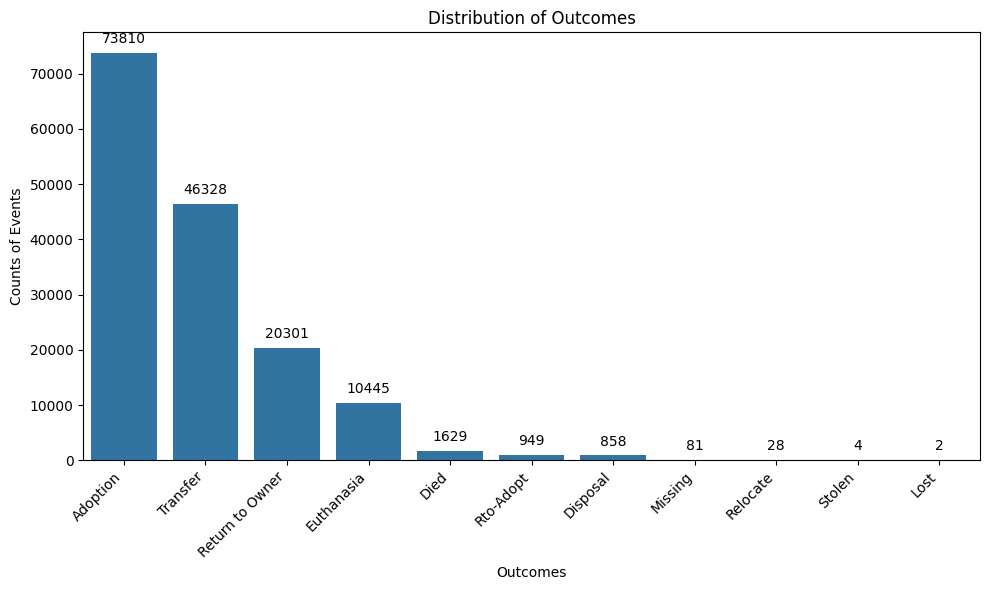

In [ ]:
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=outcome_counts.index, y=outcome_counts.values)
plt.xlabel("Outcomes")
plt.ylabel("Counts of Events")
plt.title("Distribution of Outcomes")
plt.xticks(rotation=45, ha='right')

for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}',
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='bottom',
                   xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
data['intake_type'].value_counts()

intake_type
Stray                 104886
Owner Surrender        27791
Public Assist           8310
Wildlife                6122
Abandoned               1677
Euthanasia Request       242
Name: count, dtype: int64

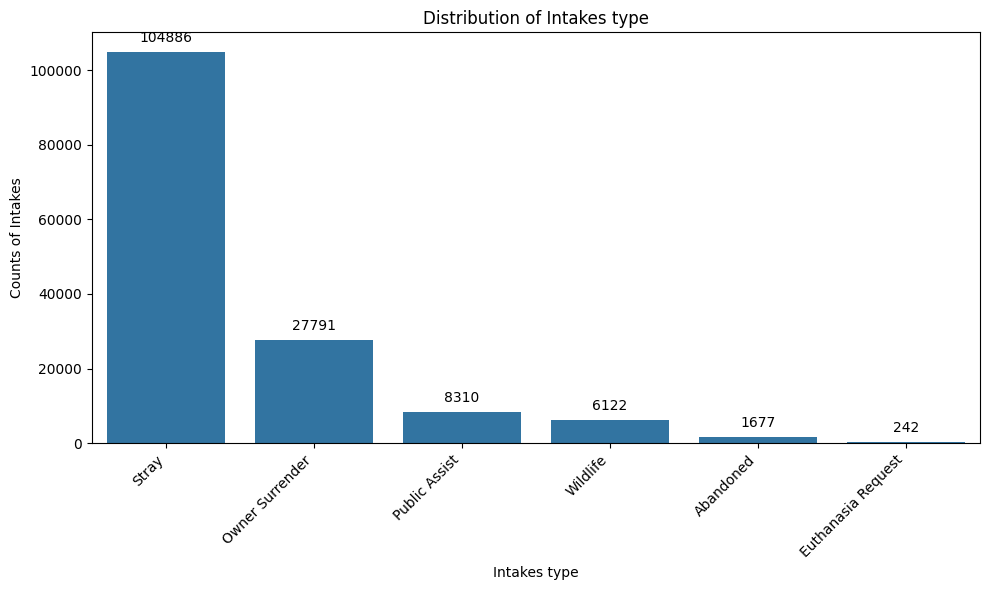

In [ ]:
intake_counts = data['intake_type'].value_counts()
intake_percentages1 = (intake_counts / len(data)) * 100
intake_percentages1

plt.figure(figsize=(10, 6))
bars = sns.barplot(x=intake_counts.index, y=intake_counts.values)
plt.xlabel("Intakes type")
plt.ylabel("Counts of Intakes")
plt.title("Distribution of Intakes type")
plt.xticks(rotation=45, ha='right')

for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}',
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='bottom',
                   xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
data['intake_condition'].value_counts()

intake_condition
Normal        124993
Injured         9660
Sick            7197
Nursing         3704
Neonatal        1712
Medical          500
Aged             459
Other            327
Pregnant         139
Feral            135
Med Attn          68
Behavior          59
Unknown           30
Med Urgent        17
Neurologic        12
Parvo              6
Space              4
Agonal             4
Panleuk            1
Congenital         1
Name: count, dtype: int64

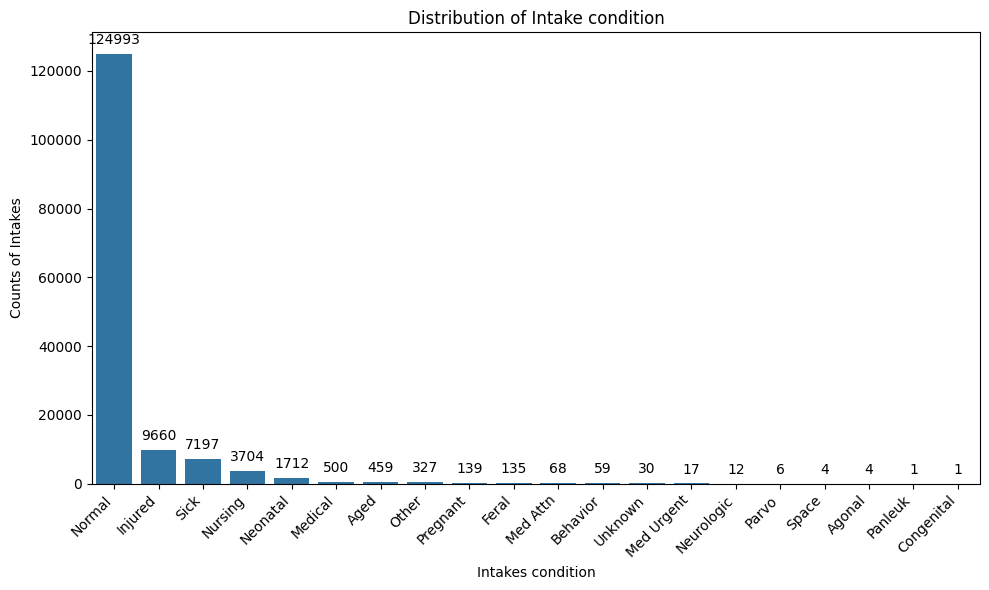

In [ ]:
intake_counts1 = data['intake_condition'].value_counts()
intake_percentages2 = (intake_counts1 / len(data)) * 100
intake_percentages2

plt.figure(figsize=(10, 6))
bars = sns.barplot(x=intake_counts1.index, y=intake_counts1.values)
plt.xlabel("Intakes condition")
plt.ylabel("Counts of Intakes")
plt.title("Distribution of Intake condition")
plt.xticks(rotation=45, ha='right')

for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}',
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='bottom',
                   xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

# ==========================
# 🚀 Data Cleaning & Data Preprocessing
# ==========================

Here we have dropped the columns

1- monthyear ->Redundant as it had the same value as datetime

2- name_y -> Redundant as it had the same value as the name_x and some missing values aswell

3- datetime2 -> Redundant as it had the same value as datetime_y

4- animal_type_y ->  Redundant as it had the same value as the animal_type_x

5- color_y ->  Redundant as it had the same value as the color_x

6- breed_y ->  Redundant as it had the same value as the breed_x

In [ ]:
data = data.drop(columns=['monthyear', 'name_y', 'datetime2', 'animal_type_y', 'color_y', 'breed_y'], errors='ignore')

# Renamed some columns

In [ ]:
data = data.rename(columns={'name_x': 'name'})

In [ ]:
data = data.rename(columns={'animal_type_x': 'animal_type'})

In [ ]:
data = data.rename(columns={'color_x': 'color'})
data = data.rename(columns={'breed_x': 'breed'})

In [ ]:
data = data.rename(columns={'datetime_x': 'datetime_of_outcome'})
data = data.rename(columns={'datetime_y': 'datetime_of_intake'})

In [ ]:
import re

def convert_age_to_days(age_str):
    # Handle negative values
    if pd.isna(age_str) or '-' in age_str:
        return np.nan

    # Extract numerical value and unit
    match = re.match(r"(\d+)\s(\w+)", age_str)
    if match:
        value, unit = int(match.group(1)), match.group(2).lower()

        # Convert to days based on unit
        if 'year' in unit:
            return value * 365
        elif 'month' in unit:
            return value * 30
        elif 'week' in unit:
            return value * 7
        elif 'day' in unit:
            return value
    return np.nan

In [ ]:
data['age_days'] = data['age_upon_outcome'].apply(convert_age_to_days)

print(data['age_days'].describe())
print("Negative or NaN Age Days:", data[data['age_days'] <= 0]['age_days'].count())

count    154456.000000
mean        693.415866
std        1018.005496
min           0.000000
25%          60.000000
50%         365.000000
75%         730.000000
max       10950.000000
Name: age_days, dtype: float64
Negative or NaN Age Days: 262


In [ ]:
def convert_age_to_days(age_str):
    # Handle negative values
    if pd.isna(age_str) or '-' in age_str:
        return np.nan

    # Extract numerical value and unit
    match = re.match(r"(\d+)\s(\w+)", age_str)
    if match:
        value, unit = int(match.group(1)), match.group(2).lower()

        # Convert to days based on unit
        if 'year' in unit:
            return value * 365
        elif 'month' in unit:
            return value * 30
        elif 'week' in unit:
            return value * 7
        elif 'day' in unit:
            return value
    return np.nan

In [ ]:
data['age_days_intake'] = data['age_upon_intake'].apply(convert_age_to_days)
print(data['age_days_intake'].describe())
print("Negative or NaN Age Days:", data[data['age_days_intake'] <= 0]['age_days_intake'].count())

count    149021.000000
mean        679.147093
std        1015.797141
min           0.000000
25%          30.000000
50%         365.000000
75%         730.000000
max       10950.000000
Name: age_days_intake, dtype: float64
Negative or NaN Age Days: 1174


In [ ]:
data['date_of_birth'] = pd.to_datetime(data['date_of_birth'], errors='coerce')

data['day_of_birth'] = data['date_of_birth'].dt.day
data['month_of_birth'] = data['date_of_birth'].dt.month
data['year_of_birth'] = data['date_of_birth'].dt.year

In [ ]:
data['datetime_of_outcome'] = pd.to_datetime(data['datetime_of_outcome'], errors='coerce')

data['outcome_event_day'] = data['datetime_of_outcome'].dt.day
data['outcome_event_month'] = data['datetime_of_outcome'].dt.month
data['outcome_event_year'] = data['datetime_of_outcome'].dt.year

In [ ]:
data['datetime_of_intake'] = pd.to_datetime(data['datetime_of_intake'], errors='coerce')

data['day_intake'] = data['datetime_of_intake'].dt.day
data['month_intake'] = data['datetime_of_intake'].dt.month
data['year_intake'] = data['datetime_of_intake'].dt.year

In [ ]:
data = data.drop(columns=['datetime_of_outcome', 'date_of_birth', 'datetime_of_intake'], errors='ignore')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155116 entries, 0 to 225647
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   animal_id            155116 non-null  object        
 1   name                 105758 non-null  object        
 2   date_of_birth        154469 non-null  datetime64[ns]
 3   outcome_type         154435 non-null  object        
 4   outcome_subtype      75346 non-null   object        
 5   animal_type          154469 non-null  object        
 6   sex_upon_outcome     154467 non-null  object        
 7   age_upon_outcome     154460 non-null  object        
 8   breed                154469 non-null  object        
 9   color                154469 non-null  object        
 10  datetime_of_intake   149028 non-null  datetime64[ns]
 11  found_location       149028 non-null  object        
 12  intake_type          149028 non-null  object        
 13  intake_condition   

##Feature Engineering - Season of outcome_event

In [ ]:
# Extract Season of Outcome_event
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Unknown'

data['outcome_event_season'] = data['outcome_event_month'].apply(get_season)

## Season of intake

In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Unknown'

data['intake_season'] = data['month_intake'].apply(get_season)

#Converting multiplecategories in sex/gender to just 3 for both at intake time and outcome event time

In [ ]:
def simplify_sex(sex):
    if sex in ['Neutered Male', 'Spayed Female']:
        return 'Fixed'
    elif sex in ['Intact Male', 'Intact Female']:
        return 'Intact'
    else:
        return 'Unknown'

data['Outcome_event_reproductive_status'] = data['sex_upon_outcome'].apply(simplify_sex)

In [ ]:
def simplify_sex(sex):
    if sex in ['Neutered Male', 'Spayed Female']:
        return 'Fixed'
    elif sex in ['Intact Male', 'Intact Female']:
        return 'Intact'
    else:
        return 'Unknown'

data['Intake_event_reproductive_status'] = data['sex_upon_intake'].apply(simplify_sex)

make a variable has_name --> binary variable instead of names that are difficult to process

In [ ]:
# Text Features from Name
data['name_length'] = data['name'].fillna('').apply(len)
data['has_name'] = data['name'].notna().astype(int)

instead of identifying and noticing the breeds we have divided them into binary categorical column

In [ ]:
# Identify Mix vs Pure
data['breed_type'] = data['breed'].apply(lambda x: 'Mix' if isinstance(x, str) and 'Mix' in x else 'Pure' if isinstance(x, str) else 'Unknown')

In [ ]:
# Convert to Binary Column
data['is_fixed_inatke'] = data['Intake_event_reproductive_status'].apply(lambda x: 1 if x == 'Fixed' else 0)

In [ ]:
# Convert to Binary Column
data['is_fixed_outcome'] = data['Outcome_event_reproductive_status'].apply(lambda x: 1 if x == 'Fixed' else 0)

In [ ]:
# Create 'Outcome_is_weekend' column
data['Outcome_is_weekend'] = data['outcome_event_day'].apply(lambda x: 1 if x >= 5 else 0)

In [ ]:
data['is_Pure_breed'] = data['breed_type'].apply(lambda x: 1 if x == 'Pure' else 0)

In [ ]:
data_transformed = data.copy()

In [ ]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155116 entries, 0 to 225647
Data columns (total 36 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   animal_id                          155116 non-null  object 
 1   name                               105758 non-null  object 
 2   outcome_type                       154435 non-null  object 
 3   outcome_subtype                    75346 non-null   object 
 4   animal_type                        154469 non-null  object 
 5   sex_upon_outcome                   154467 non-null  object 
 6   age_upon_outcome                   154460 non-null  object 
 7   breed                              154469 non-null  object 
 8   color                              154469 non-null  object 
 9   found_location                     149028 non-null  object 
 10  intake_type                        149028 non-null  object 
 11  intake_condition                   149028 no

In [ ]:
columns_to_drop = [
    'animal_id',        # Unique identifier, not useful for modeling
    'name',             # High cardinality, already encoded as name_length and has_name
    'age_upon_outcome', # Transformed into age_days and age_group
    'sex_upon_outcome', # Encoded into is_fixed
    'Outcome_event_reproductive_status', # Encoded into is_fixed_outcome
    'Intake_event_reproductive_status', # Encoded into is_fixed_intake
    'breed',            # Encoded into breed_type
    'outcome_event_month',    # Redundant with outcome_season
    'outcome_event_day',      # Low predictive power and noise
    'name_length'      # Redundant with has_name
    ]

# Drop all columns in one go
data_transformed.drop(columns=columns_to_drop, inplace=True)

In [ ]:
data_transformed.drop(columns=['outcome_subtype', 'breed_type'], inplace=True)

In [ ]:
data_transformed = data_transformed.rename(columns={'age_days': 'age_days_outcome'})

In [ ]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155116 entries, 0 to 225647
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   outcome_type          154435 non-null  object 
 1   animal_type           154469 non-null  object 
 2   color                 154469 non-null  object 
 3   found_location        149028 non-null  object 
 4   intake_type           149028 non-null  object 
 5   intake_condition      149028 non-null  object 
 6   sex_upon_intake       149026 non-null  object 
 7   age_upon_intake       149027 non-null  object 
 8   age_days_outcome      154456 non-null  float64
 9   age_days_intake       149021 non-null  float64
 10  day_of_birth          154469 non-null  float64
 11  month_of_birth        154469 non-null  float64
 12  year_of_birth         154469 non-null  float64
 13  day_intake            149028 non-null  float64
 14  month_intake          149028 non-null  float64
 15  year_

In [ ]:
data_transformed.to_csv('data_transformed.csv', index=False)

In [ ]:
data_transformed.head()

outcome_type animal_type         color  \
0   Return to Owner         Dog  Yellow/White   
9          Transfer         Dog      Tricolor   
10  Return to Owner         Dog   Brown/White   
11  Return to Owner         Dog   Black/White   
12  Return to Owner         Dog    Black/Gray   

                        found_location      intake_type intake_condition  \
0    8700 Research Blvd in Austin (TX)    Public Assist           Normal   
9                          Austin (TX)  Owner Surrender           Normal   
10  12034 Research Blvd in Austin (TX)    Public Assist          Injured   
11                         Austin (TX)            Stray             Aged   
12    Ih 35 And 41St St in Austin (TX)            Stray           Normal   

   sex_upon_intake age_upon_intake  age_days_outcome  age_days_intake  ...  \
0    Neutered Male         7 years            2555.0           2555.0  ...   
9    Neutered Male        10 years            3650.0           3650.0  ...   
10   Neutered Male        16 years            5840.0           5840.0  ...   
11   Spayed Female        15 years            5475.0           5475.0  ...   
12   Intact Female        15 years            5475.0           5475.0  ...   

    month_intake  year_intake  outcome_event_season  intake_season  has_name  \
0           12.0       2014.0                Winter         Winter         1   
9            4.0       2014.0                Spring         Spring         1   
10          11.0       2013.0                  Fall           Fall         1   
11          11.0       2013.0                  Fall           Fall         1   
12          11.0       2014.0                  Fall           Fall         1   

    is_fixed_inatke is_fixed_outcome Outcome_is_weekend  is_Pure_breed  \
0                 1                1                  1              0   
9                 1                1                  1              1   
10                1                1                  1              1   
11                1                1                  1              1   
12                0                0                  1              0   

    outcome_event_year  
0               2014.0  
9               2014.0  
10              2013.0  
11              2013.0  
12              2014.0  

[5 rows x 24 columns]

<ipython-input-97-34d4b81b56e2>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_transformed[col], shade=True)
<ipython-input-97-34d4b81b56e2>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_transformed[col], shade=True)
<ipython-input-97-34d4b81b56e2>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_transformed[col], shade=True)
<ipython-input-97-34d4b81b56e2>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_transformed[col], shade=True)
<ipython-input-97-34d4b81b56e2>:7: Futur

ValueError: num must be an integer with 1 <= num <= 9, not 10

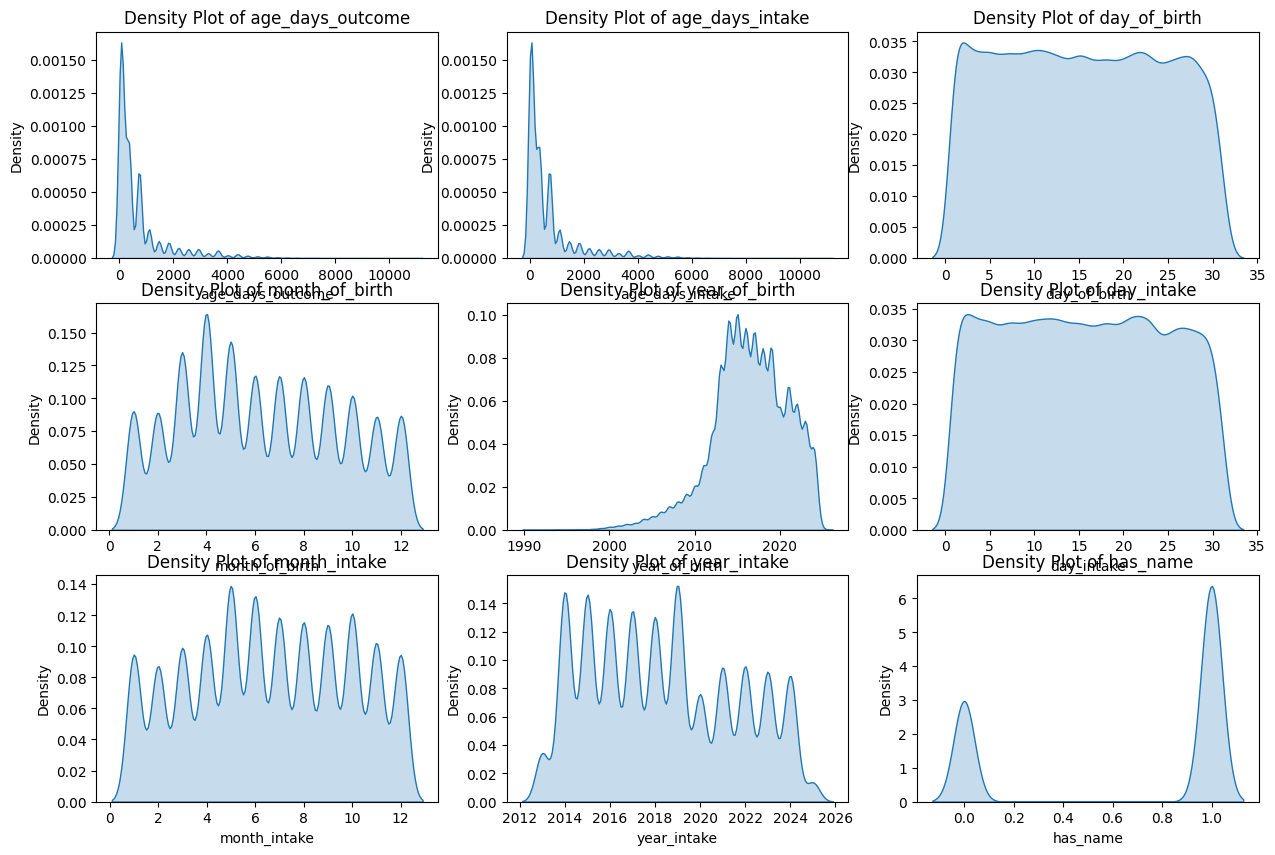

In [ ]:
numerical_features = data_transformed.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(data_transformed[col], shade=True)
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [ ]:
outcome_distribution = data_transformed.groupby(['outcome_event_season', 'outcome_type']).size().unstack(fill_value=0)
outcome_distribution

outcome_type          Adoption  Died  Disposal  Euthanasia  Lost  Missing  \
outcome_event_season                                                        
Fall                     19165   372       209        2422     1       19   
Spring                   13896   432       250        3346     1       14   
Summer                   22192   583       270        2689     0       31   
Winter                   18557   242       129        1988     0       17   

outcome_type          Relocate  Return to Owner  Rto-Adopt  Stolen  Transfer  
outcome_event_season                                                          
Fall                         9             5163        243       0     12204  
Spring                      10             5351        247       2     11708  
Summer                       6             4490        225       2     14012  
Winter                       3             5297        234       0      8404

In [ ]:
import plotly.express as px

fig = px.bar(outcome_distribution.reset_index(),
             x='outcome_event_season',
             y=outcome_distribution.columns[1:],  # Exclude the season column
             barmode='group',  # Group for each outcome type
             title='Outcome Distribution by Season',
             labels={'value': 'Count', 'variable': 'Outcome Type', 'outcome_event_season': 'Season'},
             color_discrete_sequence=px.colors.qualitative.Set3)

fig.show()

In [ ]:
import plotly.express as px

fig = px.histogram(data_transformed, x="intake_type", color="intake_season",
                   title="Intake Type Distribution by Season",
                   labels={"intake_type": "Intake Type", "intake_season": "Intake Season"},
                   category_orders={"intake_season": ["Winter", "Spring", "Summer", "Fall"]})
fig.show()

In [ ]:
import plotly.express as px

fig = px.histogram(data_transformed, x="intake_condition", color="intake_season",
                   title="Intake Condition Distribution by Season",
                   labels={"intake_condition": "Intake Condition", "intake_season": "Intake Season"},
                   category_orders={"intake_season": ["Winter", "Spring", "Summer", "Fall"]})
fig.show()

<Axes: ylabel='count'>

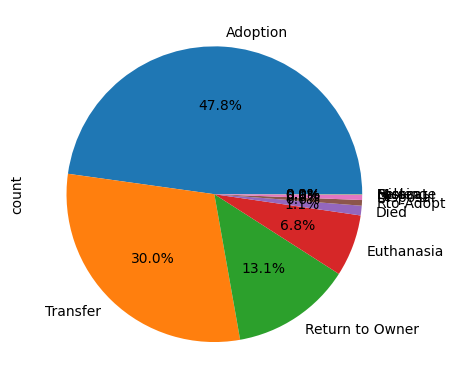

In [ ]:
data_transformed["outcome_type"].value_counts().plot.pie(autopct="%1.1f%%")

<Axes: ylabel='count'>

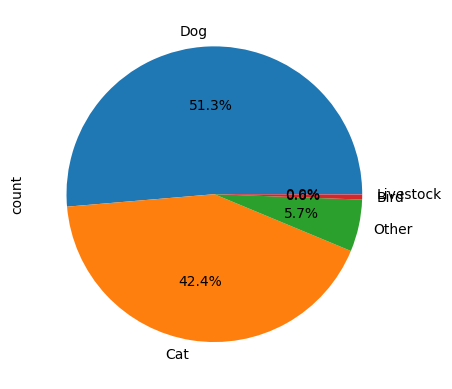

In [ ]:
data_transformed["animal_type"].value_counts().plot.pie(autopct="%1.1f%%")

<Axes: ylabel='count'>

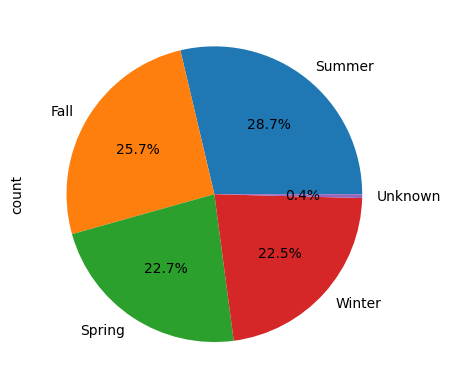

In [ ]:
data_transformed["outcome_event_season"].value_counts().plot.pie(autopct="%1.1f%%")

##Checking for null values and outliers using Isolation forest and IQR

In [ ]:
from scipy import stats
from sklearn.ensemble import IsolationForest
def analyze_data(df):
    """
    Analyzes a DataFrame for null values, percentages, and outliers.

    Args:
        df: The input DataFrame.

    Returns:
        None. Prints the analysis results.
    """
    # Null value analysis
    null_counts = df.isnull().sum()
    null_percentages = (null_counts / len(df)) * 100
    print("Null Value Analysis:")
    print(pd.concat([null_counts, null_percentages], axis=1, keys=['Count', 'Percentage']))
    print("\n")
    # Outlier analysis using IQR for numerical features
    numerical_cols = df.select_dtypes(include=np.number).columns
    print("Outlier Analysis (using IQR):")
    for col in numerical_cols:
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
      print(f"{col}: Number of outliers = {len(outliers)}, Percentage = {(len(outliers)/len(df))*100:.2f}%")
    print("\n")
    # Outlier analysis using Isolation Forest for numerical features
    print("Outlier Analysis (using Isolation Forest):")
    for col in numerical_cols:
        # Reshape the data for IsolationForest
        try:
            model = IsolationForest(contamination='auto', random_state=42)  # Adjust contamination if needed
            df_col = df[[col]]
            df_col = df_col.dropna()
            if len(df_col) > 0:  # Check for empty arrays after removing NaN
              model.fit(df_col.values.reshape(-1, 1))
              outlier_predictions = model.predict(df_col.values.reshape(-1, 1))
              outliers = df_col[outlier_predictions == -1]
              print(f"{col}: Number of outliers = {len(outliers)}, Percentage = {(len(outliers) / len(df_col)) * 100:.2f}%")
            else:
              print(f"Column '{col}' is empty after NaN removal.  Unable to compute outliers.")

        except Exception as e:
            print(f"Error processing column '{col}': {e}")

analyze_data(data_transformed)

Null Value Analysis:
                      Count  Percentage
outcome_type            681    0.439026
animal_type             647    0.417107
color                   647    0.417107
found_location         6088    3.924805
intake_type            6088    3.924805
intake_condition       6088    3.924805
sex_upon_intake        6090    3.926094
age_upon_intake        6089    3.925449
age_days_outcome        660    0.425488
age_days_intake        6095    3.929317
day_of_birth            647    0.417107
month_of_birth          647    0.417107
year_of_birth           647    0.417107
day_intake             6088    3.924805
month_intake           6088    3.924805
year_intake            6088    3.924805
outcome_event_season      0    0.000000
intake_season             0    0.000000
has_name                  0    0.000000
is_fixed_inatke           0    0.000000
is_fixed_outcome          0    0.000000
Outcome_is_weekend        0    0.000000
is_Pure_breed             0    0.000000
outcome_event_year 

In [ ]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155116 entries, 0 to 225647
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   outcome_type          154435 non-null  object 
 1   animal_type           154469 non-null  object 
 2   color                 154469 non-null  object 
 3   found_location        149028 non-null  object 
 4   intake_type           149028 non-null  object 
 5   intake_condition      149028 non-null  object 
 6   sex_upon_intake       149026 non-null  object 
 7   age_upon_intake       149027 non-null  object 
 8   age_days_outcome      154456 non-null  float64
 9   age_days_intake       149021 non-null  float64
 10  day_of_birth          154469 non-null  float64
 11  month_of_birth        154469 non-null  float64
 12  year_of_birth         154469 non-null  float64
 13  day_intake            149028 non-null  float64
 14  month_intake          149028 non-null  float64
 15  year_

## Imputation using the simple imputer pipeline & model based imputation

In [ ]:
categorical_cols = ['outcome_type', 'animal_type', 'color', 'found_location', 'intake_type',
                    'intake_condition', 'sex_upon_intake', 'age_upon_intake']
numerical_cols = ['age_days_outcome', 'age_days_intake', 'day_of_birth', 'month_of_birth',
                  'year_of_birth', 'day_intake', 'month_intake', 'year_intake', 'outcome_event_year']

In [ ]:
# --- Simple Imputation Pipeline ---
simple_imputer = ColumnTransformer([
    ("num_imputer", SimpleImputer(strategy="median"), numerical_cols),
    ("cat_imputer", SimpleImputer(strategy="most_frequent"), categorical_cols)
])

pipeline = Pipeline([
    ("imputer", simple_imputer)
])
df_imputed = pd.DataFrame(pipeline.fit_transform(data_transformed), columns=numerical_cols + categorical_cols)

In [ ]:
# --- Step 2: Model-Based Imputation  ---
def impute_using_model(df, target_column, numerical_cols, model_type="classification"):
    """
    Train a model to predict missing values in a column and fill them in.
    """
    df = data_transformed.copy()
    missing_mask = df[target_column].isnull()

    # Separate known values
    known_data = df[~missing_mask]
    missing_data = df[missing_mask]

    if missing_data.empty:
        return df  # No missing values to fill

    # Define features and target
    X = known_data[numerical_cols]
    y = known_data[target_column]

    # Train model
    if model_type == "classification":
        model = RandomForestClassifier()
    else:
        model = RandomForestRegressor()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)

    # Predict missing values
    df.loc[missing_mask, target_column] = model.predict(missing_data[numerical_cols])

    return df

# Example Usage:
# Apply the simple imputer first to the original data_transformed
simple_imputer = ColumnTransformer([
    ("num_imputer", SimpleImputer(strategy="median"), numerical_cols),
    ("cat_imputer", SimpleImputer(strategy="most_frequent"), categorical_cols)
])

pipeline = Pipeline([
    ("imputer", simple_imputer)
])
df_imputed = pd.DataFrame(pipeline.fit_transform(data_transformed), columns=numerical_cols + categorical_cols)


df_imputed = impute_using_model(df_imputed, "age_days_outcome", numerical_cols, model_type="regression")
df_imputed = impute_using_model(df_imputed, "outcome_type", numerical_cols, model_type="classification")

In [ ]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155116 entries, 0 to 225647
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   outcome_type          155116 non-null  object 
 1   animal_type           154469 non-null  object 
 2   color                 154469 non-null  object 
 3   found_location        149028 non-null  object 
 4   intake_type           149028 non-null  object 
 5   intake_condition      149028 non-null  object 
 6   sex_upon_intake       149026 non-null  object 
 7   age_upon_intake       149027 non-null  object 
 8   age_days_outcome      154456 non-null  float64
 9   age_days_intake       149021 non-null  float64
 10  day_of_birth          154469 non-null  float64
 11  month_of_birth        154469 non-null  float64
 12  year_of_birth         154469 non-null  float64
 13  day_intake            149028 non-null  float64
 14  month_intake          149028 non-null  float64
 15  year_

In [ ]:
data_transformed['intake_condition'].value_counts()

intake_condition
Normal        124993
Injured         9660
Sick            7197
Nursing         3704
Neonatal        1712
Medical          500
Aged             459
Other            327
Pregnant         139
Feral            135
Med Attn          68
Behavior          59
Unknown           30
Med Urgent        17
Neurologic        12
Parvo              6
Space              4
Agonal             4
Panleuk            1
Congenital         1
Name: count, dtype: int64

In [ ]:
data_encoded = data_transformed.copy()
categorical_cols = ['animal_type', 'outcome_event_season','intake_type']

enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = enc.fit_transform(data_encoded[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=enc.get_feature_names_out(categorical_cols))
data_encoded = data_encoded.drop(categorical_cols, axis=1)
data_encoded = pd.concat([data_encoded, encoded_df], axis=1)

In [ ]:
numerical_cols = data_encoded.select_dtypes(include=np.number).columns

scaler = StandardScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

In [ ]:
label_encoder = LabelEncoder()

data_encoded['intake_condition_encoded'] = label_encoder.fit_transform(data_encoded['intake_condition'])

In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209710 entries, 0 to 155098
Data columns (total 40 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   outcome_type                    154435 non-null  object 
 1   color                           154469 non-null  object 
 2   found_location                  149028 non-null  object 
 3   intake_condition                149028 non-null  object 
 4   sex_upon_intake                 149026 non-null  object 
 5   age_upon_intake                 149027 non-null  object 
 6   age_days_outcome                154456 non-null  float64
 7   age_days_intake                 149021 non-null  float64
 8   day_of_birth                    154469 non-null  float64
 9   month_of_birth                  154469 non-null  float64
 10  year_of_birth                   154469 non-null  float64
 11  day_intake                      149028 non-null  float64
 12  month_intake         

In [ ]:
data_encoded.drop(columns=['color'], inplace=True)

In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209710 entries, 0 to 155098
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   outcome_type                    154435 non-null  object 
 1   found_location                  149028 non-null  object 
 2   intake_condition                149028 non-null  object 
 3   sex_upon_intake                 149026 non-null  object 
 4   age_upon_intake                 149027 non-null  object 
 5   age_days_outcome                154456 non-null  float64
 6   age_days_intake                 149021 non-null  float64
 7   day_of_birth                    154469 non-null  float64
 8   month_of_birth                  154469 non-null  float64
 9   year_of_birth                   154469 non-null  float64
 10  day_intake                      149028 non-null  float64
 11  month_intake                    149028 non-null  float64
 12  year_intake          

After data EDA & Data Preprocessing

In [ ]:
# Define target and predictors
target_col = "outcome_type"
features = ["animal_type", "intake_type", "intake_condition_encoded", "age_days_outcome",
            "outcome_event_season", "has_name", "is_fixed_outcome", "is_Pure_breed","animal_type_Bird","animal_type_Cat","animal_type_Dog","animal_type_Livestock","animal_type_Other"
            ,"intake_type_Abandoned","intake_type_Euthanasia Request","intake_type_Owner Surrender","intake_type_Public Assist","intake_type_Stray","intake_type_Wildlife"]

In [ ]:
data_encoded.dropna(subset=[target_col])

outcome_type                        found_location  \
0       Return to Owner     8700 Research Blvd in Austin (TX)   
9              Transfer                           Austin (TX)   
10      Return to Owner    12034 Research Blvd in Austin (TX)   
11      Return to Owner                           Austin (TX)   
12      Return to Owner      Ih 35 And 41St St in Austin (TX)   
...                 ...                                   ...   
225585             Died                           Austin (TX)   
225586       Euthanasia                           Austin (TX)   
225643       Euthanasia  11318 Los Arboles Cir in Travis (TX)   
225644         Transfer                           Austin (TX)   
225646       Euthanasia      614 S 1St Apt 315 in Austin (TX)   

       intake_condition sex_upon_intake age_upon_intake  age_days_outcome  \
0                Normal   Neutered Male         7 years          1.828664   
9                Normal   Neutered Male        10 years          2.904300   
10              Injured   Neutered Male        16 years          5.055573   
11                 Aged   Spayed Female        15 years          4.697027   
12               Normal   Intact Female        15 years          4.697027   
...                 ...             ...             ...               ...   
225585           Normal   Intact Female         1 weeks         -0.674277   
225586           Normal   Intact Female         1 weeks               NaN   
225643           Normal         Unknown         2 years               NaN   
225644          Injured     Intact Male         4 weeks               NaN   
225646           Normal         Unknown          1 year               NaN   

        age_days_intake  day_of_birth  month_of_birth  year_of_birth  ...  \
0              1.846687     -0.729584        0.229581      -2.102779  ...   
9              2.924662     -1.521887       -0.701349      -2.773478  ...   
10             5.080611      0.062719        1.160510      -4.338445  ...   
11             4.721286     -1.635073       -0.080729      -4.114878  ...   
12             4.721286      0.402278        1.160510      -3.891312  ...   
...                 ...           ...             ...            ...  ...   
225585        -0.661696      0.175905       -1.321968       1.921420  ...   
225586        -0.661696      0.175905       -1.321968       1.921420  ...   
225643         0.050062      1.194581       -1.321968       1.474287  ...   
225644        -0.641023      1.194581       -1.632278       1.921420  ...   
225646        -0.309263      1.194581       -1.321968       1.697854  ...   

        outcome_event_season_Unknown  outcome_event_season_Winter  \
0                          -0.064719                     1.856440   
9                          -0.064719                    -0.538666   
10                         -0.064719                     1.856440   
11                         -0.064719                    -0.538666   
12                         -0.064719                     1.856440   
...                              ...                          ...   
225585                           NaN                          NaN   
225586                           NaN                          NaN   
225643                           NaN                          NaN   
225644                           NaN                          NaN   
225646                           NaN                          NaN   

        intake_type_Abandoned intake_type_Euthanasia Request  \
0                   -0.104544                      -0.039529   
9                   -0.104544                      -0.039529   
10                  -0.104544                      -0.039529   
11                  -0.104544                      -0.039529   
12                  -0.104544                      -0.039529   
...                       ...                            ...   
225585                    NaN                            NaN   
225586                    NaN          